# OSSP2 Assignment1
\<Default MDP\> 
- Environment: (4, 4) grid world
- Start: (0, 0)
- Goal: (3, 3)
- Action: 위, 왼쪽, 오른쪽, 아래로 이동
- Policy: random policy
- Gamma: 0.99

## 1. Evaluation and prediction
~~"1-1. On command line tools"은 "1-2. Jupyter"는 같은 프로그램을 수행하는 코드입니다.~~

### ~~1-1. On command line tools~~

In [ ]:
# !python DP.py
# !python MC.py 100
# !python MC.py 1000
# !python MC.py 10000
# !python MC.py 100000
# !python TD.py 1 100
# !python TD.py 1 1000
# !python TD.py 1 10000
# !python TD.py 1 100000
# !python TD.py 3 100
# !python TD.py 3 1000
# !python TD.py 3 10000
# !python TD.py 3 100000

### 1-2. Jupyter implements

In [1]:
from DP import train_DP
from MC import train_MC
from TD import train_TD
from implements.data_handler import read_result

train_DP()
true_vs, _, _ = read_result('DP')

for episode_num in [100, 1000, 10000]:
    train_MC(episode_num=episode_num, true_vs=true_vs)
    train_TD(n_step=1, episode_num=episode_num, true_vs=true_vs)
    train_TD(n_step=3, episode_num=episode_num, true_vs=true_vs)

DP evaluation completed.
MC for 100 episodes prediction completed.
1step-TD for 100 episodes prediction completed.
3step-TD for 100 episodes prediction completed.
MC for 1000 episodes prediction completed.
1step-TD for 1000 episodes prediction completed.
3step-TD for 1000 episodes prediction completed.
MC for 10000 episodes prediction completed.
1step-TD for 10000 episodes prediction completed.
3step-TD for 10000 episodes prediction completed.


## 2. Plot results

In [2]:
from implements.data_handler import read_result, get_gridlike
from matplotlib import pyplot as plt

### 2-1. DP

In [3]:
vs, _, _ = read_result(experiment='DP')
print(get_gridlike(vs))

[[-39.41164805 -38.18764094 -36.24871461 -34.64489771]
 [-38.18764094 -36.40509112 -33.33779566 -30.40047061]
 [-36.24871461 -33.33779566 -27.6034839  -20.40661627]
 [-34.64489771 -30.40047061 -20.40661627   0.        ]]


### 2-2. Bias and variance of MC, TD1, TD3 per steps


State value table with MC prediction for 100 episodes
[[-40.20362323 -37.61538792 -35.86268925 -41.02695533]
 [-39.7002998  -37.06715705 -34.21567363 -31.43823888]
 [-34.34124884 -33.53052264 -28.94714874 -18.29364979]
 [-28.5270646  -25.72684531 -15.53191487   0.        ]]

State value table with 1stepTD prediction for 100 episodes
[[-6.12364915 -5.55621527 -4.99181536 -4.33231428]
 [-5.46160654 -5.05403908 -4.32885055 -3.40801451]
 [-4.69534544 -4.39490191 -3.43522385 -2.07944862]
 [-3.90204622 -3.68408108 -2.59679485  0.        ]]

State value table with 3stepTD prediction for 100 episodes
[[-13.37527998 -12.10286486 -10.33511287  -9.1465868 ]
 [-12.20250215 -11.28780267  -9.74420251  -7.95134723]
 [-11.02995617 -10.2445287   -8.30378776  -4.5314713 ]
 [-10.21370708  -9.18021543  -5.95481606   0.        ]]

State value table with MC prediction for 1000 episodes
[[-40.04575537 -36.05203783 -39.72271302 -39.50091391]
 [-40.78926634 -34.88461292 -33.41487507 -35.96230757]
 [-36.700230

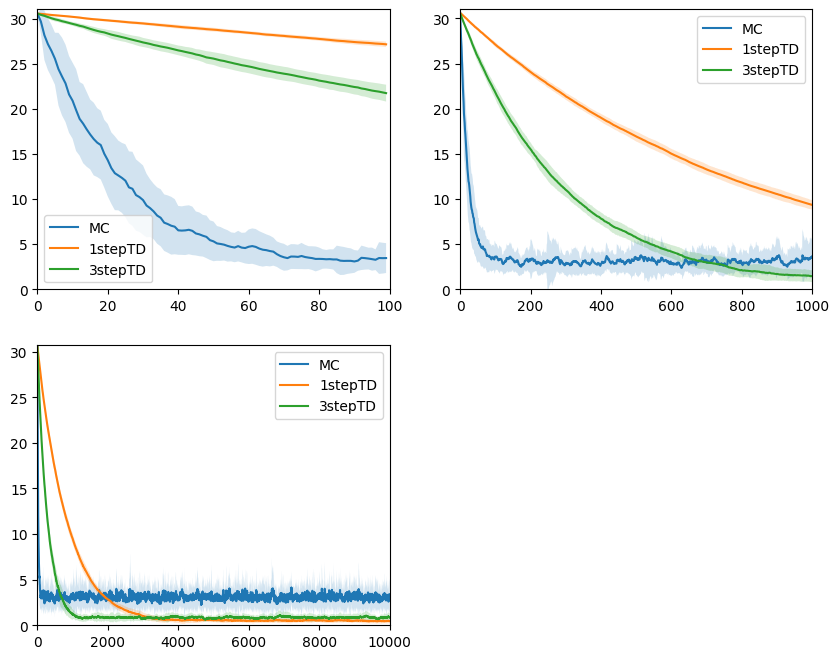

In [4]:
episode_nums = [100, 1000, 10000]
experiments = ['MC', '1stepTD', '3stepTD']

plt.figure(figsize=(10, 8))
for idx, episode_num in enumerate(episode_nums, 1):
    plt.subplot(2, 2, idx)
    y_max = 0
    for experiment in experiments:
        vs, means, std = read_result(experiment=experiment, episode_num=episode_num)
        print(f'\nState value table with {experiment} prediction for {episode_num} episodes')
        print(get_gridlike(vs))
        
        steps = [episode for episode in range(episode_num)]
        means_lower = means - std
        means_upper = means + std

        y_max = max(y_max, max(means_upper))
        plt.axis((0, episode_num, 0, y_max))
        plt.fill_between(steps, means_lower, means_upper, alpha=0.2)
        plt.plot(steps, means, label=experiment)
        plt.legend()
plt.show()